In [2]:
import numpy as np

import pylab
import pandas as pd
from pandas import DataFrame
import sqlite3
import matplotlib.pyplot as plt
import ast
import math
import time
from datetime import datetime
import glob
import sys
import copy
import cv2
from imp import reload
import scipy
from scipy import stats

# read in db flyProjects to get experimetns at 45° 20_01_07


In [3]:
readin_id2 =pd.DataFrame()
dbs =['_20_01_07.db','_19_12_09.db','_19_11_28.db']
for n in range(len(dbs)):
    print(dbs[n])

    conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustProjects"+dbs[n])
    query2 = "SELECT  post0,exp,replicate, nStimuli  FROM projects;" #
    readin_angle = pd.read_sql_query(query2,conn)


    readin_angle['index'] = list(range(len(readin_angle.index)))

    tab2=pd.DataFrame()
    #readin_angle.head(10)

    #['position','angle','distance']

    dist_read = False
    print('readin_anglekeys',readin_angle.keys())
    #60 degree angle
    angle60=(math.pi/180*60)
    angle30=(math.pi/180*30)
    angle45=(math.pi/180*45)
    angle180=(math.pi)

    a=True
    #p= pd.DataFrame(readin_angle,l)#.T.to_dict()
    for i in range(0,250):

        #(readin_angle[readin_angle['index'] == i])
        #250 diff conditions from which to pick available



        if (ast.literal_eval(readin_angle.loc[i].values[0])) != None:
            ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])

            if dist_read == False:
                dist = (ast.literal_eval(readin_angle.loc[i].values[0])['distance'])
                dist_read = True
            if readin_angle['exp'][i] <10: 
                #only experiments <10 are the exp with two post condition, >10 are 3 post cond
                #print(readin_angle['exp'][i])
                #if 
                if ang == angle30 and readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:
                    angle_used = ang
                        #selects for 60° cond and without nstim==0 or ==4 (controls with one post cond)
                        #print(i,ang)
                        #readin_angle[i]
                        #del tab
                        #print(readin_angle[readin_angle['index'] == i])
                        #Liste2=Liste2.append(readin_angle[readin_angle['index'] == i])
                    #print(ast.literal_eval(readin_angle.loc[i].values[0])['position'])
                    tab=(readin_angle[readin_angle['index'] == i])
                    tab2=tab2.append(tab,ignore_index=True)
                    if readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:
                        #print(readin_angle['nStimuli'][i])
                        pass
                #if ang == angle30 readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:



    #readin_angle
    #ang

    #print(tab2.count())
    #print('tab2keys',tab2.keys())
    #print(dist)
    #print(ang, angle_used)
    #tab2
    
    
    #######################EXPERIMENT ID READIN

    conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustExperiments"+dbs[n])

    query = "SELECT exp, replicate, date,tStart, expId FROM experiments;"
    readin_id = pd.read_sql_query(query,conn)
    print(readin_id.keys())
    readin_id=readin_id.assign(nStimuli = 5)
    #posi=(ast.literal_eval(readin_angle.loc[0].values[0])['position'])
    #posi=0
    readin_id=readin_id.assign(position_post0_x = 1.0)
    readin_id=readin_id.assign(position_post0_y = 1.0)

    #ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])

    for i in range(0,len(readin_id.index)):
        #iterate through 40 rows of readin_id

        #kombi exp+ replicate in tab2 abgleichen und nStimuli rausschreiben!)
        b=readin_id['exp'][i]
        c=readin_id['replicate'][i]
        e=readin_id['date'][i]
        #tstart=readin_id['tStart'][i]

        for d in range(len(tab2)):
            #iterate through 50 rows of tab2
            if tab2['exp'][d]==b and tab2['replicate'][d]==c:
                #print(tab2['exp'][d], tab2['replicate'][d], tab2['nStimuli'][d]  )

                #print(tab2['nStimuli'][d])
                f=tab2['nStimuli'][d]
                #g=tab2['post0']
                g=(ast.literal_eval(tab2.loc[d].values[0])['position'])
                h=round(g[0], 2)
                k=round(g[1], 2)
                #print(g.keys())
                #print(h,k)
                readin_id['nStimuli'][i]=f

                readin_id['position_post0_x'][i]=h
                readin_id['position_post0_y'][i]=k

    readin_id.reset_index(drop=True, inplace=True) 
    #exper_date='2019-12-12'
    

    
    readin_id2= readin_id2.append(readin_id, ignore_index=True)
    print(readin_id)

    #40 expIDs available

_20_01_07.db
('readin_anglekeys', Index([u'post0', u'exp', u'replicate', u'nStimuli', u'index'], dtype='object'))
Index([u'exp', u'replicate', u'date', u'tStart', u'expId'], dtype='object')


/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


    exp  replicate        date tStart                                 expId  \
0     0          2  2020-01-07  11:59  c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a   
1     0          2  2020-01-07  13:06  54a35a9f-9eb0-4404-bc9d-8ed7b71192c5   
2     0          4  2020-01-07  14:04  7ac51c48-5f5a-4ac3-9930-56772578c1ee   
3     1          3  2020-01-07  15:30  3a1d5deb-e8f7-48a4-aabb-25456f941c43   
4     1          1  2020-01-08  09:18  752b3218-e802-47e8-bbc6-1049f15e6f85   
5     2          4  2020-01-08  11:31  13e69b2f-9760-4625-a309-511af2c5afb2   
6     2          0  2020-01-08  13:12  2a7c4e5b-deb9-4c55-b0f7-2547034b8b4d   
7     2          0  2020-01-08  14:08  da620536-7437-4bf6-a7de-ba36f19b4177   
8     3          3  2020-01-08  17:30  acb6ec35-e1e0-450a-98ca-581b0f21723e   
9     3          4  2020-01-09  10:00  1730f55c-ba6b-467b-96a8-f23c387f2905   
10    3          3  2020-01-09  11:01  a57b486a-c26a-4016-9722-56846965487e   
11    4          1  2020-01-09  12:06  ded361ec-3214

# EXPERIMENT ID READIN

In [5]:
readin_id2.head(50)

,exp,replicate,date,tStart,expId,nStimuli,position_post0_x,position_post0_y
0,0,2,2020-01-07,11:59,c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a,3,-0.00,-2.00
1,0,2,2020-01-07,13:06,54a35a9f-9eb0-4404-bc9d-8ed7b71192c5,3,-0.00,-2.00
2,0,4,2020-01-07,14:04,7ac51c48-5f5a-4ac3-9930-56772578c1ee,3,-0.00,-2.00
3,1,3,2020-01-07,15:30,3a1d5deb-e8f7-48a4-aabb-25456f941c43,2,0.00,2.00
4,1,1,2020-01-08,09:18,752b3218-e802-47e8-bbc6-1049f15e6f85,3,0.00,2.00
5,2,4,2020-01-08,11:31,13e69b2f-9760-4625-a309-511af2c5afb2,1,2.00,-0.00
6,2,0,2020-01-08,13:12,2a7c4e5b-deb9-4c55-b0f7-2547034b8b4d,1,2.00,-0.00
7,2,0,2020-01-08,14:08,da620536-7437-4bf6-a7de-ba36f19b4177,1,2.00,-0.00
8,3,3,2020-01-08,17:30,acb6ec35-e1e0-450a-98ca-581b0f21723e,3,2.00,-0.00
9,3,4,2020-01-09,10:00,1730f55c-ba6b-467b-96a8-f23c387f2905,3,2.00,-0.00


# csv

In [6]:
directory = '/home/bianca/Documents/github/locustVR/databases/data_collection/'
filename = '/results.csv'
counting=0
initialise = False
#for i in readin_id2.index:
for i in range (0,(len(readin_id2))):
#for i in range(0,1):
    #iterate through 20 leftover exp ids in readin_id that have 2 post cond, no control, only 60°
    path = (directory + readin_id2['expId'][i] + filename)
    tstart = readin_id2['tStart'][i]
    exper_date = readin_id2['date'][i]
    print('tstart',tstart)  


    print(path)
    
     
    try:
        df = pd.read_csv(path)
        print(path)
    except:
        print('***************************csv in row %d doesnt exist**********************' %(i))
    
    #extends list to experimentID column
    df=df.assign(pos0x = (readin_id2['position_post0_x'][i]))
    df=df.assign(pos0y = (readin_id2['position_post0_y'][i]))
    #print(readin_id['expId'][i])
    df.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
    stim = readin_id2['nStimuli'][i]
    #print stim
    #for j in range(0,len(df)):
    #    if df['nStimuli'][j]== stim:
    
    #select those with stimuli according to readin_in info those with the specific angle
    df=(df.loc[df['nStimuli'] == stim])  
    print(i)
    if initialise == False:
        df3=df
        df3.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
        initialise = True

    
    if i > 0:
        df3=df3.append(df, ignore_index=True)
        counting+=1
    print(counting, df.count)
    

    '''df3=df
    df3=df3.append(df, ignore_index=True)
    
    df3.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']'''

    
print('tstart', tstart)
df3 = df3.reset_index()
df3

('tstart', u'11:59')
/home/bianca/Documents/github/locustVR/databases/data_collection/c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a/results.csv
0
(0, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
49228 -0.000327  0.000089  0.0     0  1950.023793         3   -0.0   -2.0
49229 -0.001907  0.000506  0.0     0  1950.068343         3   -0.0   -2.0
49230 -0.003092  0.000826  0.0     0  1950.110276         3   -0.0   -2.0
49231 -0.003976  0.001098  0.0     0  1950.146753         3   -0.0   -2.0
49232 -0.005150  0.001449  0.0     0  1950.181044         3   -0.0   -2.0
49233 -0.005977  0.001669  0.0     0  1950.216890         3   -0.0   -2.0
49234 -0.007010  0.001923  0.0     0  1950.250543         3   -0.0   -2.0
49235 -0.007729  0.002072  0.0     0  1950.287638         3   -0.0   -2.0
49236 -0.008651  0.002233  0.0     0  1950.325

2
(2, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
46020  0.000536  0.000245  0.0     1  1950.000031         3   -0.0   -2.0
46021  0.000533  0.000224  0.0     1  1953.037760         3   -0.0   -2.0
46022  0.000512  0.000132  0.0     1  1953.073253         3   -0.0   -2.0
46023  0.000476  0.000056  0.0     1  1953.110335         3   -0.0   -2.0
46024  0.000412 -0.000036  0.0     1  1953.147814         3   -0.0   -2.0
46025  0.000316 -0.000155  0.0     1  1953.195760         3   -0.0   -2.0
46026  0.000229 -0.000260  0.0     1  1953.245201         3   -0.0   -2.0
46027  0.000139 -0.000363  0.0     1  1953.282886         3   -0.0   -2.0
46028  0.000047 -0.000438  0.0     1  1953.317926         3   -0.0   -2.0
46029 -0.000048 -0.000503  0.0     1  1953.357730         3   -0.0   -2.0
46030 -0.000143 -0.000564  0.0     1  1953.399325         3   -0.0   -2.0
46031 -0.000215 -0.000591  0.0     1  1953.433867         3   -0.0   -2.0

/home/bianca/Documents/github/locustVR/databases/data_collection/13e69b2f-9760-4625-a309-511af2c5afb2/results.csv
5
(5, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
12966  0.031940 -0.039444  0.0     1   510.000058         1    2.0   -0.0
12967  0.031940 -0.039444  0.0     1   513.025970         1    2.0   -0.0
12968  0.033036 -0.040668  0.0     1   513.065451         1    2.0   -0.0
12969  0.033866 -0.041596  0.0     1   513.103831         1    2.0   -0.0
12970  0.034987 -0.042865  0.0     1   513.141523         1    2.0   -0.0
12971  0.036096 -0.044126  0.0     1   513.179063         1    2.0   -0.0
12972  0.036906 -0.045072  0.0     1   513.215088         1    2.0   -0.0
12973  0.038003 -0.046354  0.0     1   513.252925         1    2.0   -0.0
12974  0.039010 -0.047624  0.0     1   513.292104         1    2.0   -0.0
12975  0.039603 -0.048570  0.0     1   513.327729         1    2.0   -0.0
12976  0.040267 -0.049504  0.0   

/home/bianca/Documents/github/locustVR/databases/data_collection/acb6ec35-e1e0-450a-98ca-581b0f21723e/results.csv
8
(8, <bound method DataFrame.count of               x             y    z  cntr            t  nStimuli  pos0x  pos0y
48151  0.000732 -3.611330e-03  0.0     1  1950.000103         3    2.0   -0.0
48152  0.000494 -3.985010e-03  0.0     1  1953.051396         3    2.0   -0.0
48153  0.000182 -4.358330e-03  0.0     1  1953.085614         3    2.0   -0.0
48154 -0.000299 -4.824920e-03  0.0     1  1953.120286         3    2.0   -0.0
48155 -0.000593 -4.990890e-03  0.0     1  1953.160290         3    2.0   -0.0
48156 -0.000776 -5.013820e-03  0.0     1  1953.199579         3    2.0   -0.0
48157 -0.000813 -4.731220e-03  0.0     1  1953.237097         3    2.0   -0.0
48158 -0.000599 -4.112610e-03  0.0     1  1953.274521         3    2.0   -0.0
48159 -0.000333 -3.515910e-03  0.0     1  1953.306396         3    2.0   -0.0
48160  0.000006 -2.810400e-03  0.0     1  1953.340434         3    

/home/bianca/Documents/github/locustVR/databases/data_collection/ded361ec-3214-458a-858f-1be11809fd14/results.csv
11
(11, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
13403  0.000717  0.000616  0.0     0   510.027076         1    2.0   -0.0
13404  0.001782  0.001534  0.0     0   510.058194         1    2.0   -0.0
13405  0.002854  0.002435  0.0     0   510.096834         1    2.0   -0.0
13406  0.004065  0.003443  0.0     0   510.134117         1    2.0   -0.0
13407  0.004502  0.003825  0.0     0   510.167863         1    2.0   -0.0
13408  0.004606  0.004128  0.0     0   510.202143         1    2.0   -0.0
13409  0.004289  0.004213  0.0     0   510.243935         1    2.0   -0.0
13410  0.003736  0.004166  0.0     0   510.283100         1    2.0   -0.0
13411  0.003056  0.003825  0.0     0   510.325409         1    2.0   -0.0
13412  0.002535  0.003455  0.0     0   510.360133         1    2.0   -0.0
13413  0.001909  0.002909  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/5cb7d44f-5166-46ce-b317-f4bd8d3267c5/results.csv
14
(14, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
31677  0.000000  0.000000  0.0     0  1230.005823         2   -2.0    0.0
31678  0.000648 -0.000066  0.0     0  1230.056853         2   -2.0    0.0
31679  0.001230 -0.000165  0.0     0  1230.101324         2   -2.0    0.0
31680  0.001798 -0.000280  0.0     0  1230.147704         2   -2.0    0.0
31681  0.002283 -0.000433  0.0     0  1230.187495         2   -2.0    0.0
31682  0.002613 -0.000595  0.0     0  1230.228638         2   -2.0    0.0
31683  0.002840 -0.000762  0.0     0  1230.268136         2   -2.0    0.0
31684  0.003027 -0.000908  0.0     0  1230.307720         2   -2.0    0.0
31685  0.003247 -0.001014  0.0     0  1230.347496         2   -2.0    0.0
31686  0.003453 -0.001078  0.0     0  1230.389180         2   -2.0    0.0
31687  0.003687 -0.001128  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/19c69caf-3dc5-4cf4-950c-95acad45ecd9/results.csv
17
(17, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
48469 -0.000356 -0.000048  0.0     0  1950.028705         3  -1.41  -1.41
48470 -0.000892 -0.000119  0.0     0  1950.062475         3  -1.41  -1.41
48471 -0.001653 -0.000224  0.0     0  1950.098700         3  -1.41  -1.41
48472 -0.002263 -0.000351  0.0     0  1950.132111         3  -1.41  -1.41
48473 -0.003142 -0.000563  0.0     0  1950.170312         3  -1.41  -1.41
48474 -0.003798 -0.000742  0.0     0  1950.204268         3  -1.41  -1.41
48475 -0.004655 -0.000994  0.0     0  1950.243373         3  -1.41  -1.41
48476 -0.005252 -0.001172  0.0     0  1950.278296         3  -1.41  -1.41
48477 -0.005933 -0.001372  0.0     0  1950.311796         3  -1.41  -1.41
48478 -0.006361 -0.001495  0.0     0  1950.345645         3  -1.41  -1.41
48479 -0.006715 -0.001588  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/5e103a3b-105b-4820-92e1-b2c2cf2c11ee/results.csv
20
(20, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
50605 -0.050395  0.115580  0.0     0  1950.005669         3   -0.0   -2.0
50606  0.000048  0.000366  0.0     0  1950.044338         3   -0.0   -2.0
50607  0.000139  0.000815  0.0     0  1950.083162         3   -0.0   -2.0
50608  0.000251  0.001196  0.0     0  1950.118943         3   -0.0   -2.0
50609  0.000347  0.001448  0.0     0  1950.157546         3   -0.0   -2.0
50610  0.000483  0.001751  0.0     0  1950.193750         3   -0.0   -2.0
50611  0.000602  0.001981  0.0     0  1950.228074         3   -0.0   -2.0
50612  0.000775  0.002263  0.0     0  1950.264708         3   -0.0   -2.0
50613  0.000900  0.002473  0.0     0  1950.299170         3   -0.0   -2.0
50614  0.001031  0.002665  0.0     0  1950.334479         3   -0.0   -2.0
50615  0.001303  0.002947  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/bb55e2f3-585f-4f80-8150-a719ef75deec/results.csv
23
(23, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
49779 -0.001453 -0.000437  0.0     1  1950.000095         3  -1.41   1.41
49780 -0.001460 -0.000446  0.0     1  1953.037682         3  -1.41   1.41
49781 -0.001482 -0.000467  0.0     1  1953.077101         3  -1.41   1.41
49782 -0.001493 -0.000468  0.0     1  1953.114457         3  -1.41   1.41
49783 -0.001503 -0.000449  0.0     1  1953.151197         3  -1.41   1.41
49784 -0.001517 -0.000436  0.0     1  1953.189953         3  -1.41   1.41
49785 -0.001545 -0.000433  0.0     1  1953.231753         3  -1.41   1.41
49786 -0.001590 -0.000427  0.0     1  1953.268026         3  -1.41   1.41
49787 -0.001641 -0.000438  0.0     1  1953.314671         3  -1.41   1.41
49788 -0.001708 -0.000450  0.0     1  1953.352379         3  -1.41   1.41
49789 -0.001768 -0.000427  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/7dfa5ca0-9425-4f3f-8e09-061b01eb9435/results.csv
26
(26, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
30568 -0.000248 -0.000666  0.0     0  1230.033183         2    2.0   -0.0
30569 -0.000599 -0.001637  0.0     0  1230.068929         2    2.0   -0.0
30570 -0.001074 -0.002926  0.0     0  1230.109633         2    2.0   -0.0
30571 -0.001618 -0.004272  0.0     0  1230.146632         2    2.0   -0.0
30572 -0.002226 -0.005638  0.0     0  1230.184363         2    2.0   -0.0
30573 -0.002704 -0.006668  0.0     0  1230.221255         2    2.0   -0.0
30574 -0.003335 -0.008027  0.0     0  1230.258856         2    2.0   -0.0
30575 -0.003819 -0.009026  0.0     0  1230.293367         2    2.0   -0.0
30576 -0.004501 -0.010367  0.0     0  1230.327851         2    2.0   -0.0
30577 -0.005008 -0.011318  0.0     0  1230.361829         2    2.0   -0.0
30578 -0.005669 -0.012494  0.0 

29
(29, <bound method DataFrame.count of               x         y    z  cntr           t  nStimuli  pos0x  pos0y
4556  -0.000664 -0.001959  0.0   0.0   90.000007       1.0   -2.0    0.0
4557  -0.000631 -0.001920  0.0   0.0   93.031970       1.0   -2.0    0.0
4558  -0.000539 -0.001798  0.0   0.0   93.063102       1.0   -2.0    0.0
4559  -0.000472 -0.001688  0.0   0.0   93.093310       1.0   -2.0    0.0
4560  -0.000413 -0.001588  0.0   0.0   93.124019       1.0   -2.0    0.0
4561  -0.000346 -0.001492  0.0   0.0   93.158834       1.0   -2.0    0.0
4562  -0.000319 -0.001434  0.0   0.0   93.188787       1.0   -2.0    0.0
4563  -0.000363 -0.001366  0.0   0.0   93.233697       1.0   -2.0    0.0
4564  -0.000474 -0.001254  0.0   0.0   93.280047       1.0   -2.0    0.0
4565  -0.000672 -0.001120  0.0   0.0   93.318229       1.0   -2.0    0.0
4566  -0.000835 -0.001043  0.0   0.0   93.344237       1.0   -2.0    0.0
4567  -0.000992 -0.001014  0.0   0.0   93.369335       1.0   -2.0    0.0
4568  -0.0

/home/bianca/Documents/github/locustVR/databases/data_collection/c7f84a6e-7645-49a4-8580-dcd190cfdc26/results.csv
32
(32, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
9341  -0.007868 -0.008176  0.0     1   300.000149         1   1.41   1.41
9342  -0.008178 -0.008546  0.0     1   303.063658         1   1.41   1.41
9343  -0.008528 -0.009072  0.0     1   303.111417         1   1.41   1.41
9344  -0.008650 -0.009297  0.0     1   303.139767         1   1.41   1.41
9345  -0.008846 -0.009673  0.0     1   303.168675         1   1.41   1.41
9346  -0.008966 -0.010021  0.0     1   303.199853         1   1.41   1.41
9347  -0.009033 -0.010254  0.0     1   303.225602         1   1.41   1.41
9348  -0.009106 -0.010602  0.0     1   303.254161         1   1.41   1.41
9349  -0.009146 -0.010920  0.0     1   303.280984         1   1.41   1.41
9350  -0.009140 -0.011198  0.0     1   303.312119         1   1.41   1.41
9351  -0.009085 -0.011471  0.0 

(34, <bound method DataFrame.count of               x         y    z  cntr           t  nStimuli  pos0x  pos0y
7031   0.000322 -0.003452  0.0     1  228.000147         1   -2.0    0.0
7032   0.000322 -0.003452  0.0     1  231.027740         1   -2.0    0.0
7033   0.000176 -0.004095  0.0     1  231.058733         1   -2.0    0.0
7034   0.000028 -0.004718  0.0     1  231.093004         1   -2.0    0.0
7035  -0.000144 -0.005311  0.0     1  231.123185         1   -2.0    0.0
7036  -0.000363 -0.005841  0.0     1  231.154088         1   -2.0    0.0
7037  -0.000660 -0.006459  0.0     1  231.186675         1   -2.0    0.0
7038  -0.000870 -0.006836  0.0     1  231.219474         1   -2.0    0.0
7039  -0.001097 -0.007161  0.0     1  231.251833         1   -2.0    0.0
7040  -0.001325 -0.007400  0.0     1  231.277967         1   -2.0    0.0
7041  -0.001532 -0.007560  0.0     1  231.308899         1   -2.0    0.0
7042  -0.001754 -0.007704  0.0     1  231.341824         1   -2.0    0.0
7043  -0.0019

(37, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
27183  0.235124  0.892059  0.0     0   948.031860         2    0.0    2.0
27184  0.235124  0.892059  0.0     0   948.063520         2    0.0    2.0
27185  0.235124  0.892059  0.0     0   948.092500         2    0.0    2.0
27186  0.235124  0.892059  0.0     0   948.125864         2    0.0    2.0
27187  0.235124  0.892059  0.0     0   948.156011         2    0.0    2.0
27188  0.235124  0.892059  0.0     0   948.185089         2    0.0    2.0
27189  0.235124  0.892059  0.0     0   948.218752         2    0.0    2.0
27190  0.235124  0.892059  0.0     0   948.249093         2    0.0    2.0
27191  0.235124  0.892059  0.0     0   948.275762         2    0.0    2.0
27192  0.235124  0.892059  0.0     0   948.303274         2    0.0    2.0
27193  0.235124  0.892059  0.0     0   948.330650         2    0.0    2.0
27194  0.235124  0.892059  0.0     0   948.360589         2    0.0    2.0


(40, <bound method DataFrame.count of               x         y    z  cntr           t  nStimuli  pos0x  pos0y
6274  -0.001167 -0.000051  0.0     0  228.027674         1   1.41   1.41
6275  -0.002895 -0.000224  0.0     0  228.061507         1   1.41   1.41
6276  -0.004442 -0.000421  0.0     0  228.092492         1   1.41   1.41
6277  -0.006129 -0.000601  0.0     0  228.126259         1   1.41   1.41
6278  -0.007091 -0.000617  0.0     0  228.158333         1   1.41   1.41
6279  -0.007858 -0.000582  0.0     0  228.190289         1   1.41   1.41
6280  -0.008484 -0.000553  0.0     0  228.225734         1   1.41   1.41
6281  -0.009179 -0.000461  0.0     0  228.258370         1   1.41   1.41
6282  -0.009730 -0.000403  0.0     0  228.288578         1   1.41   1.41
6283  -0.010401 -0.000348  0.0     0  228.324680         1   1.41   1.41
6284  -0.011077 -0.000248  0.0     0  228.361890         1   1.41   1.41
6285  -0.012190 -0.000106  0.0     0  228.394930         1   1.41   1.41
6286  -0.0132

/home/bianca/Documents/github/locustVR/databases/data_collection/69011dfe-8ad1-435d-bbef-c2b35ebb6c0d/results.csv
44
(44, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
25672  0.000000  0.000000  0.0     0  1020.012216         2   -0.0   -2.0
25673  0.000961 -0.000309  0.0     0  1020.053857         2   -0.0   -2.0
25674  0.001700 -0.000501  0.0     0  1020.095136         2   -0.0   -2.0
25675  0.002200 -0.000614  0.0     0  1020.134534         2   -0.0   -2.0
25676  0.002655 -0.000827  0.0     0  1020.170355         2   -0.0   -2.0
25677  0.002969 -0.001032  0.0     0  1020.209344         2   -0.0   -2.0
25678  0.003135 -0.001240  0.0     0  1020.252093         2   -0.0   -2.0
25679  0.003052 -0.001563  0.0     0  1020.298364         2   -0.0   -2.0
25680  0.002959 -0.001721  0.0     0  1020.335969         2   -0.0   -2.0
25681  0.002787 -0.001901  0.0     0  1020.374263         2   -0.0   -2.0
25682  0.002677 -0.001977  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/f065d8d3-1b6f-4fc2-9445-2d01512710ae/results.csv
47
(47, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
13226 -0.026172  0.026191  0.0     1   510.000030         1    2.0   -0.0
13227 -0.026682  0.026656  0.0     1   513.046483         1    2.0   -0.0
13228 -0.027686  0.027553  0.0     1   513.082612         1    2.0   -0.0
13229 -0.028486  0.028261  0.0     1   513.117279         1    2.0   -0.0
13230 -0.029569  0.029213  0.0     1   513.151455         1    2.0   -0.0
13231 -0.030392  0.029911  0.0     1   513.189534         1    2.0   -0.0
13232 -0.032054  0.031266  0.0     1   513.244344         1    2.0   -0.0
13233 -0.033756  0.032588  0.0     1   513.312382         1    2.0   -0.0
13234 -0.034816  0.033448  0.0     1   513.349824         1    2.0   -0.0
13235 -0.036180  0.034626  0.0     1   513.396118         1    2.0   -0.0
13236 -0.036978  0.035383  0.0 

(49, <bound method DataFrame.count of               x             y    z  cntr            t  nStimuli  pos0x  pos0y
13227  0.000006  8.000000e-08  0.0     0   510.026291         1   -0.0   -2.0
13228  0.000020  3.400000e-07  0.0     0   510.064423         1   -0.0   -2.0
13229  0.000033 -1.720000e-05  0.0     0   510.106289         1   -0.0   -2.0
13230  0.000040 -2.941000e-05  0.0     0   510.144874         1   -0.0   -2.0
13231  0.000024 -3.674000e-05  0.0     0   510.181946         1   -0.0   -2.0
13232  0.000001 -4.023000e-05  0.0     0   510.214681         1   -0.0   -2.0
13233 -0.000019 -4.303000e-05  0.0     0   510.250261         1   -0.0   -2.0
13234 -0.000018 -5.614000e-05  0.0     0   510.289083         1   -0.0   -2.0
13235  0.000010 -9.499000e-05  0.0     0   510.331260         1   -0.0   -2.0
13236  0.000058 -1.520200e-04  0.0     0   510.376953         1   -0.0   -2.0
13237  0.000096 -2.117800e-04  0.0     0   510.415841         1   -0.0   -2.0
13238  0.000130 -2.783700e

/home/bianca/Documents/github/locustVR/databases/data_collection/e88a5554-fec1-458c-9c83-c98e5529e6fd/results.csv
52
(52, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
49142 -0.005922  0.024397  0.0     1  1950.000063         3   -0.0   -2.0
49143 -0.006108  0.024670  0.0     1  1953.041258         3   -0.0   -2.0
49144 -0.006291  0.025070  0.0     1  1953.074090         3   -0.0   -2.0
49145 -0.006530  0.025880  0.0     1  1953.110677         3   -0.0   -2.0
49146 -0.006728  0.026764  0.0     1  1953.149136         3   -0.0   -2.0
49147 -0.006863  0.027480  0.0     1  1953.186287         3   -0.0   -2.0
49148 -0.007088  0.028767  0.0     1  1953.235159         3   -0.0   -2.0
49149 -0.007249  0.029811  0.0     1  1953.275486         3   -0.0   -2.0
49150 -0.007381  0.030779  0.0     1  1953.312091         3   -0.0   -2.0
49151 -0.007467  0.031419  0.0     1  1953.349818         3   -0.0   -2.0
49152 -0.007549  0.032115  0.0 

(56, <bound method DataFrame.count of Empty DataFrame
Columns: [x, y, z, cntr, t, nStimuli, pos0x, pos0y]
Index: []>)
('tstart', u'08:41')
/home/bianca/Documents/github/locustVR/databases/data_collection/fea86966-c7a8-49f5-bf93-f8a38453e875/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/fea86966-c7a8-49f5-bf93-f8a38453e875/results.csv
57
(57, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
68155  0.000000  0.000000  0.0     0  2100.013156         3   1.41  -1.41
68156  0.000275 -0.000764  0.0     0  2100.044642         3   1.41  -1.41
68157  0.000518 -0.001514  0.0     0  2100.076655         3   1.41  -1.41
68158  0.000725 -0.002167  0.0     0  2100.108096         3   1.41  -1.41
68159  0.000947 -0.002979  0.0     0  2100.140389         3   1.41  -1.41
68160  0.001094 -0.003644  0.0     0  2100.170842         3   1.41  -1.41
68161  0.001228 -0.004335  0.0     0  2100.202752         3   1.41  -1.41


(61, <bound method DataFrame.count of Empty DataFrame
Columns: [x, y, z, cntr, t, nStimuli, pos0x, pos0y]
Index: []>)
('tstart', u'10:17')
/home/bianca/Documents/github/locustVR/databases/data_collection/353adab2-d51f-4885-adba-508ba2cac467/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/353adab2-d51f-4885-adba-508ba2cac467/results.csv
62
(62, <bound method DataFrame.count of               x         y    z  cntr           t  nStimuli  pos0x  pos0y
6788  -0.003838 -0.008940  0.0     0  228.001019         1   -0.0   -2.0
6789   0.000000  0.000000  0.0     0  236.021432         1   -0.0   -2.0
6790  -0.000084  0.000029  0.0     0  236.054761         1   -0.0   -2.0
6791  -0.000355 -0.000145  0.0     0  236.084659         1   -0.0   -2.0
6792  -0.000493 -0.000182  0.0     0  236.115513         1   -0.0   -2.0
6793  -0.000667 -0.000279  0.0     0  236.149760         1   -0.0   -2.0
6794  -0.000870 -0.000408  0.0     0  236.182812         1   -0.0   -2.0
6795  -0

/home/bianca/Documents/github/locustVR/databases/data_collection/e3f84ff4-d4b5-415b-9527-5ac834f7cba4/results.csv
64
(64, <bound method DataFrame.count of               x         y    z  cntr           t  nStimuli  pos0x  pos0y
6474  -0.000421  0.000338  0.0     0  228.000778         1    2.0   -0.0
6475   0.000000  0.000000  0.0     0  236.013859         1    2.0   -0.0
6476  -0.000632 -0.000482  0.0     0  236.060176         1    2.0   -0.0
6477  -0.001164 -0.000875  0.0     0  236.099252         1    2.0   -0.0
6478  -0.001407 -0.001005  0.0     0  236.135286         1    2.0   -0.0
6479  -0.001488 -0.001059  0.0     0  236.178160         1    2.0   -0.0
6480  -0.000814 -0.000628  0.0     0  236.220437         1    2.0   -0.0
6481  -0.000175 -0.000207  0.0     0  236.251723         1    2.0   -0.0
6482   0.000305  0.000124  0.0     0  236.283405         1    2.0   -0.0
6483   0.000485  0.000239  0.0     0  236.314307         1    2.0   -0.0
6484   0.000827  0.000476  0.0     0  236.

(66, <bound method DataFrame.count of                   x         y    z  cntr           t  nStimuli  pos0x  pos0y
6698   4.072200e-04  0.001917  0.0     0  228.000728         1   -0.0   -2.0
6699   7.950000e-06 -0.000006  0.0     0  236.031072         1   -0.0   -2.0
6700   1.035000e-05 -0.000006  0.0     0  236.064490         1   -0.0   -2.0
6701   2.690000e-06 -0.000018  0.0     0  236.097588         1   -0.0   -2.0
6702  -9.200000e-07  0.000004  0.0     0  236.126091         1   -0.0   -2.0
6703  -2.620000e-06  0.000029  0.0     0  236.157330         1   -0.0   -2.0
6704  -1.586000e-05  0.000066  0.0     0  236.188798         1   -0.0   -2.0
6705  -2.249000e-05  0.000103  0.0     0  236.222386         1   -0.0   -2.0
6706  -2.614000e-05  0.000148  0.0     0  236.254643         1   -0.0   -2.0
6707  -2.717000e-05  0.000205  0.0     0  236.285871         1   -0.0   -2.0
6708  -2.760000e-05  0.000239  0.0     0  236.318779         1   -0.0   -2.0
6709  -2.775000e-05  0.000260  0.0    

/home/bianca/Documents/github/locustVR/databases/data_collection/e3ce0a89-62ec-47fe-b850-d22b0d0d0527/results.csv
69
(69, <bound method DataFrame.count of               x         y    z  cntr           t  nStimuli  pos0x  pos0y
7815   0.000083  0.001253  0.0     0  180.000026         1  -1.41   1.41
7816  -0.000013  0.001213  0.0     1  180.000026         1  -1.41   1.41
7817  -0.000091  0.001419  0.0     1  182.043250         1  -1.41   1.41
7818  -0.000256  0.001850  0.0     1  182.084452         1  -1.41   1.41
7819  -0.000393  0.002209  0.0     1  182.118079         1  -1.41   1.41
7820  -0.000613  0.002744  0.0     1  182.151851         1  -1.41   1.41
7821  -0.000819  0.003135  0.0     1  182.185341         1  -1.41   1.41
7822  -0.001106  0.003713  0.0     1  182.222837         1  -1.41   1.41
7823  -0.001288  0.004201  0.0     1  182.258916         1  -1.41   1.41
7824  -0.001498  0.004866  0.0     1  182.295677         1  -1.41   1.41
7825  -0.001694  0.005258  0.0     1  182.

/home/bianca/Documents/github/locustVR/databases/data_collection/2f236bc2-25bd-4988-bd6e-f607b9b84f16/results.csv
71
(71, <bound method DataFrame.count of               x         y    z  cntr           t  nStimuli  pos0x  pos0y
7739   0.002016  0.000087  0.0     0  180.000016         1  -1.41   1.41
7740   0.001977  0.000046  0.0     0  183.058097         1  -1.41   1.41
7741   0.001942  0.000010  0.0     0  183.095314         1  -1.41   1.41
7742   0.001904 -0.000003  0.0     0  183.129728         1  -1.41   1.41
7743   0.001865 -0.000017  0.0     0  183.168723         1  -1.41   1.41
7744   0.001823 -0.000006  0.0     0  183.219308         1  -1.41   1.41
7745   0.001802  0.000030  0.0     0  183.258884         1  -1.41   1.41
7746   0.001791  0.000053  0.0     0  183.292409         1  -1.41   1.41
7747   0.001781  0.000074  0.0     0  183.327234         1  -1.41   1.41
7748   0.001773  0.000100  0.0     0  183.371463         1  -1.41   1.41
7749   0.001766  0.000152  0.0     0  183.

/home/bianca/Documents/github/locustVR/databases/data_collection/209364f5-752f-407b-93c9-b888cd72bed8/results.csv
73
(73, <bound method DataFrame.count of               x         y    z  cntr           t  nStimuli  pos0x  pos0y
7829   0.017356 -0.002140  0.0     0  180.000003         1  -1.41   1.41
7830   0.018047 -0.002086  0.0     0  183.037844         1  -1.41   1.41
7831   0.019105 -0.002017  0.0     0  183.071947         1  -1.41   1.41
7832   0.020507 -0.001946  0.0     0  183.107824         1  -1.41   1.41
7833   0.021604 -0.001885  0.0     0  183.144687         1  -1.41   1.41
7834   0.023178 -0.001797  0.0     0  183.177548         1  -1.41   1.41
7835   0.024795 -0.001703  0.0     0  183.226721         1  -1.41   1.41
7836   0.026741 -0.001586  0.0     0  183.271894         1  -1.41   1.41
7837   0.027887 -0.001544  0.0     0  183.304956         1  -1.41   1.41
7838   0.029014 -0.001533  0.0     0  183.337133         1  -1.41   1.41
7839   0.030464 -0.001556  0.0     0  183.

/home/bianca/Documents/github/locustVR/databases/data_collection/e60266be-c44d-41a6-a3de-17518bccb1cc/results.csv
75
(75, <bound method DataFrame.count of                x         y    z  cntr            t  nStimuli  pos0x  pos0y
288084 -0.009340  0.012145  0.0     1   780.000002         2   1.41  -1.41
288085 -0.009340  0.012145  0.0     1   783.030034         2   1.41  -1.41
288086 -0.009340  0.012145  0.0     1   783.047249         2   1.41  -1.41
288087 -0.009551  0.012344  0.0     1   783.061498         2   1.41  -1.41
288088 -0.009618  0.012412  0.0     1   783.068663         2   1.41  -1.41
288089 -0.009682  0.012484  0.0     1   783.079915         2   1.41  -1.41
288090 -0.009741  0.012553  0.0     1   783.089059         2   1.41  -1.41
288091 -0.009789  0.012618  0.0     1   783.098318         2   1.41  -1.41
288092 -0.009833  0.012681  0.0     1   783.109540         2   1.41  -1.41
288093 -0.009864  0.012741  0.0     1   783.119380         2   1.41  -1.41
288094 -0.009894  0.

/home/bianca/Documents/github/locustVR/databases/data_collection/88f78724-8677-471b-9340-71829d40c2bb/results.csv
77
(77, <bound method DataFrame.count of Empty DataFrame
Columns: [x, y, z, cntr, t, nStimuli, pos0x, pos0y]
Index: []>)
('tstart', u'11:27')
/home/bianca/Documents/github/locustVR/databases/data_collection/001d9058-7736-4d81-965f-a6daee530e55/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/001d9058-7736-4d81-965f-a6daee530e55/results.csv
78
(78, <bound method DataFrame.count of                x         y    z  cntr            t  nStimuli  pos0x  pos0y
458598  0.166478 -0.552785  0.0     0  1530.001843         3  -1.41  -1.41
458599  0.166478 -0.552785  0.0     0  1530.010640         3  -1.41  -1.41
458600  0.166478 -0.552785  0.0     0  1530.024531         3  -1.41  -1.41
458601  0.000000  0.000000  0.0     0  1530.035533         3  -1.41  -1.41
458602  0.000000  0.000000  0.0     0  1530.045181         3  -1.41  -1.41
458603  0.000064 -0.00025

/home/bianca/Documents/github/locustVR/databases/data_collection/1eb32c86-8b1e-4786-a3b4-d87a1299ac21/results.csv
80
(80, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
24817 -0.001043  0.000576  0.0     0   810.024653         2    0.0    2.0
24818 -0.002635  0.001467  0.0     0   810.054994         2    0.0    2.0
24819 -0.004832  0.002714  0.0     0   810.094251         2    0.0    2.0
24820 -0.006470  0.003631  0.0     0   810.126499         2    0.0    2.0
24821 -0.008099  0.004510  0.0     0   810.161592         2    0.0    2.0
24822 -0.010875  0.005947  0.0     0   810.209638         2    0.0    2.0
24823 -0.012526  0.006780  0.0     0   810.238446         2    0.0    2.0
24824 -0.014157  0.007599  0.0     0   810.273374         2    0.0    2.0
24825 -0.016346  0.008665  0.0     0   810.308194         2    0.0    2.0
24826 -0.017976  0.009408  0.0     0   810.346345         2    0.0    2.0
24827 -0.019646  0.010127  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/2d05a269-0ac1-4cdc-8a61-72d17cb62f4f/results.csv
82
(82, <bound method DataFrame.count of                   x         y    z  cntr            t  nStimuli  pos0x  pos0y
25447  5.172000e-05  0.003859  0.0     1   810.000035         2   1.41  -1.41
25448  1.107300e-04  0.003788  0.0     1   813.042176         2   1.41  -1.41
25449  1.955200e-04  0.003664  0.0     1   813.087123         2   1.41  -1.41
25450  2.522400e-04  0.003556  0.0     1   813.121948         2   1.41  -1.41
25451  2.736300e-04  0.003504  0.0     1   813.151292         2   1.41  -1.41
25452  3.063800e-04  0.003394  0.0     1   813.183983         2   1.41  -1.41
25453  3.135200e-04  0.003306  0.0     1   813.217791         2   1.41  -1.41
25454  3.773000e-04  0.003066  0.0     1   813.247238         2   1.41  -1.41
25455  4.252300e-04  0.002867  0.0     1   813.278042         2   1.41  -1.41
25456  4.450300e-04  0.002715  0.0     1   813.306084         2  

(85, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
47128 -0.000974  0.000306  0.0     0  1530.030503         3    0.0    2.0
47129 -0.002961  0.000854  0.0     0  1530.073309         3    0.0    2.0
47130 -0.005924  0.001585  0.0     0  1530.126600         3    0.0    2.0
47131 -0.007780  0.002098  0.0     0  1530.168465         3    0.0    2.0
47132 -0.010124  0.002736  0.0     0  1530.220504         3    0.0    2.0
47133 -0.012071  0.003243  0.0     0  1530.256683         3    0.0    2.0
47134 -0.013574  0.003646  0.0     0  1530.287265         3    0.0    2.0
47135 -0.014570  0.003915  0.0     0  1530.316243         3    0.0    2.0
47136 -0.016080  0.004307  0.0     0  1530.346714         3    0.0    2.0
47137 -0.018015  0.004860  0.0     0  1530.379299         3    0.0    2.0
47138 -0.019379  0.005284  0.0     0  1530.411476         3    0.0    2.0
47139 -0.020735  0.005716  0.0     0  1530.449375         3    0.0    2.0


,index,x,y,z,cntr,t,nStimuli,pos0x,pos0y
0,0,-0.000327,0.000089,0,0.0,1950.023793,3.0,-0.00,-2.00
1,1,-0.001907,0.000506,0,0.0,1950.068343,3.0,-0.00,-2.00
2,2,-0.003092,0.000826,0,0.0,1950.110276,3.0,-0.00,-2.00
3,3,-0.003976,0.001098,0,0.0,1950.146753,3.0,-0.00,-2.00
4,4,-0.005150,0.001449,0,0.0,1950.181044,3.0,-0.00,-2.00
5,5,-0.005977,0.001669,0,0.0,1950.216890,3.0,-0.00,-2.00
6,6,-0.007010,0.001923,0,0.0,1950.250543,3.0,-0.00,-2.00
7,7,-0.007729,0.002072,0,0.0,1950.287638,3.0,-0.00,-2.00
8,8,-0.008651,0.002233,0,0.0,1950.325561,3.0,-0.00,-2.00
9,9,-0.009310,0.002326,0,0.0,1950.359229,3.0,-0.00,-2.00



# rotate all x and y values at certain ang from experiments

In [7]:
print(angle_used*180/math.pi)


30.0


In [8]:
rotaa= np.zeros([len(df3),2])
#rotaa[][1]=3
print(rotaa[4][1])


0.0


In [9]:
t0 = time.time()
#8 angles in matrices depending on starting position of post0

#change habp= half the angle between posts angle accord. to current investigation!!!:
#here for 60° angle half is 30° so pi/6
#habp = (math.pi)/6   #60
#habp = (math.pi)/12
habp = angle_used/2

#rotation angles; referring to post position:
# post1 immer ccc zu post0. also in kreisrichtung (pihalbe, pi..) drehrichtung ist hier richtig!!!
ang5_0 = 2  *math.pi - habp
ang33  = 1.75*math.pi - habp

ang0_5 = 1.5*math.pi - habp
angm33 = 1.25*math.pi - habp

angm5_0 = 1*math.pi   - habp
angm3m3 = 0.75*math.pi - habp

ang0_m5 = 0.5*math.pi - habp
ang3m3 = 0.25*math.pi - habp

def rotation(x,y, theta):
    #theta = 0
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    a,b=np.dot(R,[x,y])
    
    return a,b

rot=[]

dist_45 = round(((dist**2)/2)**0.5 , 2)   #square_root_2a_sq, distance at on x or y axis at 45 degree 


for l in range(len(df3)): #(): len(df3) 0,40000
    #print('df3 in spalte x',df3['x'][l])
    x=df3['x'][l]
    y=df3['y'][l]
    #print(x,y)
    
    if df3['pos0x'][l]== dist and df3['pos0y'][l]== 0.00:
        theta = ang5_0
        
    if df3['pos0x'][l]== dist_45 and df3['pos0y'][l]== dist_45:
        theta = ang33
        
    if df3['pos0x'][l]== 0.00 and df3['pos0y'][l]== dist:
        theta = ang0_5
        
    if df3['pos0x'][l]== -dist_45 and df3['pos0y'][l]== dist_45:
        theta = angm33
        
    if df3['pos0x'][l]== -dist and df3['pos0y'][l]== 0.00:
        theta = angm5_0
        
    if df3['pos0x'][l]== -dist_45 and df3['pos0y'][l]== -dist_45:
        theta = angm3m3
        
    if df3['pos0x'][l]== 0.00 and df3['pos0y'][l]== -dist:
        theta = ang0_m5
        

    if df3['pos0x'][l]== dist_45 and df3['pos0y'][l]== -dist_45:
        theta = ang3m3
    coord =     rotation(x,y,theta)
    #coord.extend= rotation(x,y,theta)
    rotaa[l][0]=coord[0]
    rotaa[l][1]=coord[1]
    #print('rot',rotation(x,y,theta))
    #df=df.assign(pos0x = (readin_id['position_post0_x'][i]))
    #df4['x'][l]=(coord[0])
    #df4['y'][l]=(coord[1])
    #rota.extend(coord[0])
    #rotaa.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
    #rot.extend([(rotation(x,y,theta))])
    #list rot contains all rotated values at 60° from all experiments!
    #x_rot,y_rot=    rotation(x,y,theta)  
#print('length df3',len(df3))
#print('length of rot',len(rot))
#print(rot[0][0])
#print(coord[1])
df3=df3.assign(x_rot = (rotaa[: ,0]))   
df3=df3.assign(y_rot = (rotaa[: ,1]))  
print(df3)

           index         x         y  z  cntr            t  nStimuli  pos0x  \
0              0 -0.000327  0.000089  0   0.0  1950.023793       3.0  -0.00   
1              1 -0.001907  0.000506  0   0.0  1950.068343       3.0  -0.00   
2              2 -0.003092  0.000826  0   0.0  1950.110276       3.0  -0.00   
3              3 -0.003976  0.001098  0   0.0  1950.146753       3.0  -0.00   
4              4 -0.005150  0.001449  0   0.0  1950.181044       3.0  -0.00   
5              5 -0.005977  0.001669  0   0.0  1950.216890       3.0  -0.00   
6              6 -0.007010  0.001923  0   0.0  1950.250543       3.0  -0.00   
7              7 -0.007729  0.002072  0   0.0  1950.287638       3.0  -0.00   
8              8 -0.008651  0.002233  0   0.0  1950.325561       3.0  -0.00   
9              9 -0.009310  0.002326  0   0.0  1950.359229       3.0  -0.00   
10            10 -0.010138  0.002402  0   0.0  1950.393585       3.0  -0.00   
11            11 -0.010727  0.002435  0   0.0  1950.

In [10]:
nprot = np.array(df3)

In [11]:
rotaa

array([[-1.70659368e-04, -2.92962563e-04],
       [-9.82305546e-04, -1.71140534e-03],
       [-1.59834076e-03, -2.77324500e-03],
       ...,
       [-2.88152743e-01, -1.57235609e-01],
       [-2.88654147e-01, -1.57692191e-01],
       [-2.80769327e-02, -3.05463861e-02]])

In [12]:
np.array(df['x'])

array([ 0.00028605,  0.00120865,  0.00257787, ...,  0.00790634,
        0.00776163, -0.01241548])

In [13]:
print(df3)

           index         x         y  z  cntr            t  nStimuli  pos0x  \
0              0 -0.000327  0.000089  0   0.0  1950.023793       3.0  -0.00   
1              1 -0.001907  0.000506  0   0.0  1950.068343       3.0  -0.00   
2              2 -0.003092  0.000826  0   0.0  1950.110276       3.0  -0.00   
3              3 -0.003976  0.001098  0   0.0  1950.146753       3.0  -0.00   
4              4 -0.005150  0.001449  0   0.0  1950.181044       3.0  -0.00   
5              5 -0.005977  0.001669  0   0.0  1950.216890       3.0  -0.00   
6              6 -0.007010  0.001923  0   0.0  1950.250543       3.0  -0.00   
7              7 -0.007729  0.002072  0   0.0  1950.287638       3.0  -0.00   
8              8 -0.008651  0.002233  0   0.0  1950.325561       3.0  -0.00   
9              9 -0.009310  0.002326  0   0.0  1950.359229       3.0  -0.00   
10            10 -0.010138  0.002402  0   0.0  1950.393585       3.0  -0.00   
11            11 -0.010727  0.002435  0   0.0  1950.

# reduce noise:
#take out all trajectories that don't end in dist of 30 cm to post


In [15]:
dot_x

NameError: name 'dot_x' is not defined

In [16]:
add = False
line =[0] #gives info of end of trial
cn =0
post0_cntr =0
post1_cntr =0
bad_loc =0
good_loc =0
#define centre of posts:
dot_x = math.cos(habp)*dist
dot_y = math.sin(habp)*dist
df6=pd.DataFrame()
p0_traj=pd.DataFrame()
p1_traj=pd.DataFrame()

#distance to centre of post(0,1) in last row of trial:
for l in range (len(df3)-1):
    if df3['cntr'][l] != df3['cntr'][l+1]:
        #print(df3['cntr'][l],df3['cntr'][l+1], l, df3['index'][l])
        line.append(l)
        cn += 1
        
        #check if locust position in line l is close enough to post:
        lo_p0_dist = ((dot_x- df3['x_rot'][l]     )**2 + (-dot_y- df3['y_rot'][l]     )**2)**0.5 
        lo_p1_dist = ((dot_x-  df3['x_rot'][l]    )**2 + (dot_y-  df3['y_rot'][l]   )**2)**0.5 
        
        
        if lo_p0_dist < 0.3 and df3['x_rot'][l] < (dot_x+0.1) or lo_p1_dist < 0.3 and df3['x_rot'][l] < (dot_x+0.1):
            good_loc += 1
            #print(lo_p0_dist,lo_p1_dist )
            #print(l,'last row of a dataset to be added')
            #add = True
            line_start_incl = line[cn-1]
            df_add=df3.loc[line_start_incl : l]
            #print('include lines from to',line_start_incl, l)
            df6=df6.append(df_add, ignore_index=True)
            if lo_p0_dist < 0.3 and df3['x_rot'][l] < (dot_x+0.1):
                p0_traj =  p0_traj.append(df_add, ignore_index=True)     
                post0_cntr +=1
            if lo_p1_dist < 0.3 and df3['x_rot'][l] < (dot_x+0.1):    
                p1_traj =  p1_traj.append(df_add, ignore_index=True)       
                post1_cntr +=1
        if lo_p0_dist > 0.3 and lo_p1_dist > 0.3:
            bad_loc += 1

            
print('post0:',post0_cntr,'post1:',post1_cntr, 'no post reached:', bad_loc)
            
#print(line)
#df6

('post0:', 70, 'post1:', 88, 'no post reached:', 1030)


# Plotting


In [17]:
#plt.hist(np.array(rot))

In [18]:
ang3= (ang*180)/math.pi



print(ang3,dot_x, dot_y,ang)
math.cos(ang)

a=30.0
str(int(a))

(59.99999999999999, 1.9318516525781366, 0.5176380902050415, 1.0471975511965976)


'30'

In [19]:
type(speeds)

if type(c) is np.ndarray:
    col_param = 'speed_col'    
else:
    col_param = 'black'
print(col_param)

NameError: name 'speeds' is not defined

('angle between posts:', '30')
black


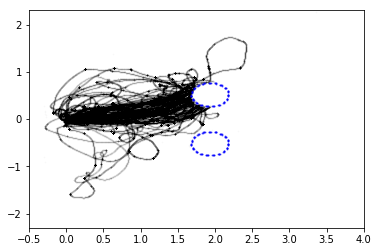

In [20]:
## df3 is original trajectories, df6 is noise reduced; only traject that FINISH at the post
ANGLE = np.round(angle_used*180/math.pi).astype(int)
print('angle between posts:', str(ANGLE))
trajectory = p1_traj # p0_traj df6 #all without noise # df3 with noise
now= datetime.now()
act_date = now.strftime('%Y-%m-%d')

#trajectories
color =  'black'  #speeds #
plt.scatter(np.array(trajectory)[:,9], np.array(trajectory)[:,10],c=color ,s=0.5, alpha=0.02)# s=0.0005, alpha=0.5) #c=speeds   'black'

if type(color) is np.ndarray:
    col_param = 'speed_col'    
else:
    col_param = 'black'
print(col_param)


#posts (approx size)
dot_x = math.cos(habp)*dist
dot_y = math.sin(habp)*dist
#plt.scatter(dot_x,dot_y, c='red', s=2900)
#plt.scatter(dot_x,-dot_y, c='blue', s=2900)

#limits of x and y axis
plt.xlim(-0.5,4)
plt.ylim(-2.3,2.3)
#appropriate size of posts in grey lines
plotting_angles = list(range(0,361,5))
ploX=[]
ploY=[]
plo=[np.linspace(0, 360, num=100)]
for i in range(0,100):
    ploX.extend([(math.cos(plo[0][i]))])
    ploY.extend([(math.sin(plo[0][i]))])
    plt.scatter((np.array(ploX)[i])*0.25+dot_x, np.array(ploY)[i]*0.25+dot_y, c='blue', s=1, alpha=0.5)
    plt.scatter((np.array(ploX)[i])*0.25+dot_x, np.array(ploY)[i]*0.25-dot_y, c='blue', s=1, alpha=0.5)
    
#act_date
filename = '/home/bianca/Documents/github/locustVR/plotting/'+str(ANGLE) + '_2post_no_noise_p1'+ col_param +'_'+exper_date+'_'+'_all_dbs_'+ '.png'
#filename = '/home/bianca/Documents/github/locustVR/plotting/'+str(ANGLE) + '_2post_'+ col_param +'_'+exper_date+'_'+tstart+ '.png'

#speeds[np.where(speeds>4)[0]] = 0
#fig.set_dpi(100)

plt.savefig(filename, dpi=(250))

In [21]:
#trajectory = p0_traj


In [22]:

xs = np.array(trajectory['x_rot'])
ys = np.array(trajectory['y_rot'])


In [23]:
nbins = 251      #bins 280, val 171      300,211  , 300 val=171,221
peak_threshold = 0.8
post0_x = dot_x
post0_y = -dot_y
post1_y = dot_y
thr = 0.9

def density_map(x, y, stats=True):

    val = 71 #201

    blur = (11,11) if stats == True else (val,val) #blur 11,11
    r = ([[0, post0_x], [post0_y, post1_y]])
    
    h, xedge, yedge, image = plt.hist2d(x, y, bins=nbins, normed=True, range=r)


    tmp_img = np.flipud(np.rot90(cv2.GaussianBlur(h, blur, 0)))
    for i in range(0, nbins):
        
        #max_val = np.sum(tmp_img[:, i])/(1+i**0.25)
        max_val = np.max(tmp_img[:, i])
        tmp_img[:, i] = tmp_img[:, i] / max_val
        #tmp_img[(tmp_img[:, i])>thr, i]=0.9
        #tmp_img[:, i] = tmp_img[:, i] / 0.9
    return tmp_img

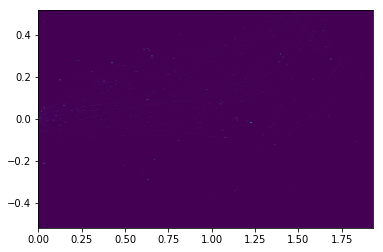

In [29]:
img = density_map(xs, ys, stats=False)


x_peaks = np.where(img > peak_threshold)[1] * post0_x / nbins
y_peaks = np.where(img > peak_threshold)[0] * (post0_y - post1_y) / nbins + post1_y

In [30]:
post0_x

1.9318516525781366

In [31]:
Both=img_p1+img_p0
for i in range(0, nbins):
        
        #max_val = np.sum(tmp_img[:, i])/(1+i**0.25)
    max_val = np.max(Both[:, i])
    Both[:, i] = Both[:, i] / max_val
        #tmp_img[(tmp_img[:, i])>thr, i]=0.9
        #tmp_img[:, i] = tmp_img[:, i] / 0.9
    

NameError: name 'img_p1' is not defined

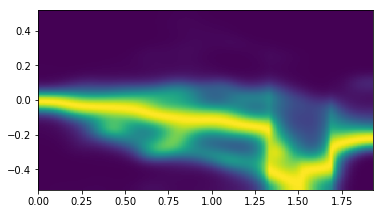

In [32]:
plt.imshow(img_p0 ** 2, extent=[0, post0_x, post0_y, post1_y])

filename = '/home/bianca/Documents/github/locustVR/plotting/'+str(ANGLE) + '_2post_checkp1+0'+str(nbins)+ '_'+exper_date+'_'+'heat'+ '.png'

plt.savefig(filename, dpi=(250))

NameError: name 'data' is not defined

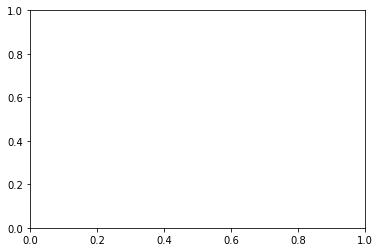

In [33]:


def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[5]-extent[1])/(extent[5]-extent[2]))/aspect)

#data = np.random.rand(0,2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data)
ax.set_xlabel('xlabel')
ax.set_aspect(1)
plt.scatter(np.array(rot)[50:,0], np.array(rot)[50:,1],c=color ,s=0.5, alpha=0.02)# s=0.0005, alpha=0.5) #c=speeds   'black'


# plotting speed

In [104]:
#taking unrotated x,y values from df3
#if df['nStimuli'][j]== stim:
#print(df3['y'][i])  
#i=10000 

#need of implementation speed in relation to post-distance or starting point distance. otherwise two different locusts 
#plotted on top of each other don't make sense. they need some synchronization which is post-distance?? 
#bifurcation point distance?
window = 30 #even number!

#original unturned values

'''d_v = []
for i in range(window,(len(df6))): #len(df3)
    d=((((df6['x'][i]-df6['x'][i-window])**2 + (df6['y'][i]-df6['y'][i-window])**2)**0.5)/(df6['t'][i]-df6['t'][i-window]))
    #if d != 0.0:
        #d_v=( )

    #plt.scatter(np.array(rot)[:,0], np.array(rot)[:,1], c='black', s=1, alpha=0.01)
    #plt.scatter(df4['x'], df4['y'], c='black', s=1, alpha=0.01)
    #speed relative to location on x
    d_v.extend([(d*100,df6['x'][i+window/2])]) # *100 to get cm/s'''
    #speed to time
    #d_v.extend([(d*100,df3['t'][i])]) # *100 to get cm/s


"d_v = []\nfor i in range(window,(len(df6))): #len(df3)\n    d=((((df6['x'][i]-df6['x'][i-window])**2 + (df6['y'][i]-df6['y'][i-window])**2)**0.5)/(df6['t'][i]-df6['t'][i-window]))\n    #if d != 0.0:\n        #d_v=( )\n\n    #plt.scatter(np.array(rot)[:,0], np.array(rot)[:,1], c='black', s=1, alpha=0.01)\n    #plt.scatter(df4['x'], df4['y'], c='black', s=1, alpha=0.01)\n    #speed relative to location on x\n    d_v.extend([(d*100,df6['x'][i+window/2])]) # *100 to get cm/s"

In [105]:
#    rot.extend([(rotation(x,y,theta))])
d_v2 =[]
trajectory =  p1_traj # p0_traj df6 #all without noise # df3 with noise
for i in range(window,len(trajectory)): #len(df3)# df3 = +noise
    delta=((((trajectory['x_rot'][i]-trajectory['x_rot'][i-window])**2 + (trajectory['y_rot'][i]-trajectory['y_rot'][i-window]) **2)**0.5)/(trajectory['t'][i]-trajectory['t'][i-window]))
    #if d != 0.0:
        #d_v=( )
    d_v2.extend([(delta*100,trajectory['x_rot'][i-window/2])]) #delta is between i and i+window, x is centered in frame
    # *100 to get cm/s

(0, 8)

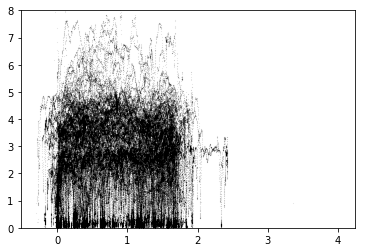

In [106]:
#color can get a list of colors to use for certain ID of the fly /locust

plt.scatter(np.array(d_v2)[:,1], np.array(d_v2)[:,0], c='black', s=0.001, alpha=1)
plt.ylim([0,8])

In [107]:
#p1_traj[:,9] x, column 10 = y
# calc distance to post

distances1 =np.array( ((dot_x - p1_traj['x_rot'])**2 + (dot_y - p1_traj['y_rot'])**2 )**0.5)
distances1 = np.array(distances1[window/2:-window/2])
distances1.shape


(244962,)

In [140]:
speeds = np.array(d_v2)[:,0]
speeds.shape

(244962,)

In [171]:
#
speeds[np.where(speeds>9)[0]] = np.nan
speeds[np.where(speeds<0)[0]] = np.nan
speed_selector = (speeds>0.75)
stop_selector = (speeds<0.05)

#stops = speeds[np.where(speeds<0.9)[0]]

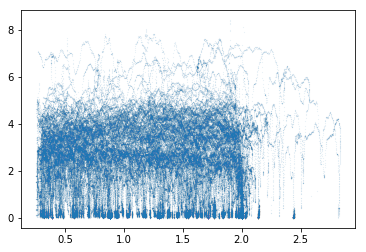

In [148]:
#distance to post1 -- speeds

plt.scatter(distances1,speeds,s=0.001, alpha=1)


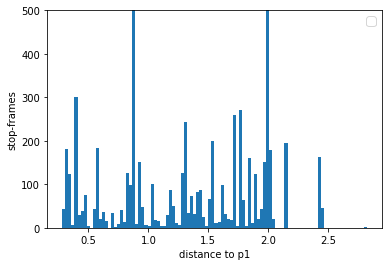

In [174]:
#plt.scatter(distances1[stop_selector],speeds[stop_selector],s=0.1, alpha=1)
plt.hist(distances1[stop_selector], bins= 100, label='')
plt.ylim([0,500])
plt.xlabel('distance to p1')
plt.ylabel('stop-frames')

plt.legend(fontsize=12)

In [159]:
#statistics, bin_edges, binnum = stats.binned_statistic(distances1[stop_selector],speeds[stop_selector],statistic='median',bins=150)
#bin_mids = (bin_edges[0:-1]+bin_edges[1:])/2
#plt.scatter(bin_mids,statistics,label='only speed<0.')

#plt.hist()

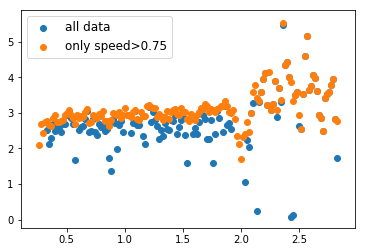

In [129]:
statistics, bin_edges, binnum = stats.binned_statistic(distances1,speeds,statistic='median',bins=150)
bin_mids = (bin_edges[0:-1]+bin_edges[1:])/2
plt.scatter(bin_mids,statistics,label='all data')

statistics, bin_edges, binnum = stats.binned_statistic(distances1[speed_selector],speeds[speed_selector],statistic='median',bins=150)
bin_mids = (bin_edges[0:-1]+bin_edges[1:])/2
plt.scatter(bin_mids,statistics,label='only speed>0.75')
# plt.ylim([0,2])
plt.legend(fontsize=12)

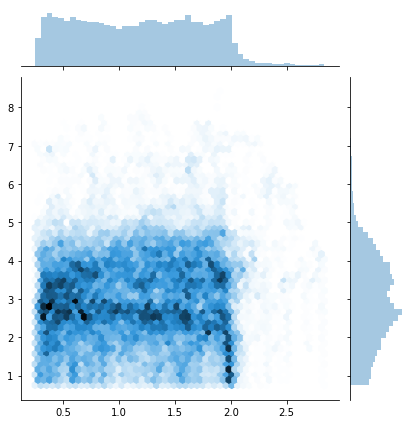

In [118]:
import seaborn as sns
sns.jointplot(distances1[speed_selector],speeds[speed_selector],kind='hex')

In [121]:
#stats

#df6.describe()
speed_df= pd.DataFrame(speeds)#
#speed_df.describe()


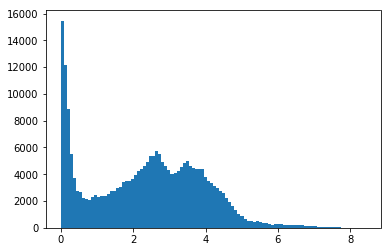

In [119]:
#plt.hist(speeds)




pylab.figure()
pylab.hist(speeds[~np.isnan(speeds)], bins=100)
pylab.show()

ValueError: x and y must be the same size

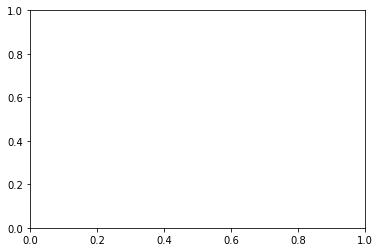

In [103]:
#x_coord -- speed

plt.scatter(df6['x_rot'][window:],speeds,s=0.0001, alpha=1)

#df6['x'][:]

(array([6.86560e+04, 1.06503e+05, 1.04195e+05, 1.16205e+05, 1.00358e+05,
        4.61400e+03, 1.35400e+03, 7.16000e+02, 1.00000e+00, 1.00000e+00]),
 array([-0.30852875,  0.12529639,  0.55912152,  0.99294666,  1.42677179,
         1.86059693,  2.29442206,  2.7282472 ,  3.16207233,  3.59589747,
         4.0297226 ]),
 <a list of 10 Patch objects>)

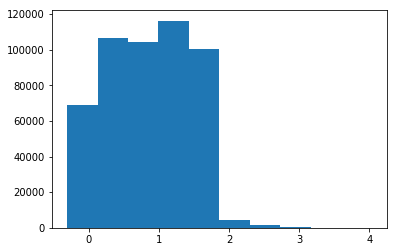

In [169]:
plt.hist(df6['x_rot'])

In [170]:
df6.shape

(502603, 11)

In [171]:
len(speeds)

502601

(array([136803.,  51518.,  70606.,  83684.,  72334.,  49277.,  21559.,
          9461.,   4938.,   2421.]),
 array([0.        , 0.79999621, 1.59999241, 2.39998862, 3.19998482,
        3.99998103, 4.79997724, 5.59997344, 6.39996965, 7.19996585,
        7.99996206]),
 <a list of 10 Patch objects>)

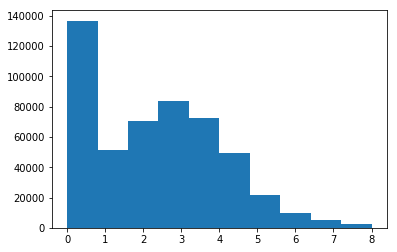

In [172]:
plt.hist(speeds)

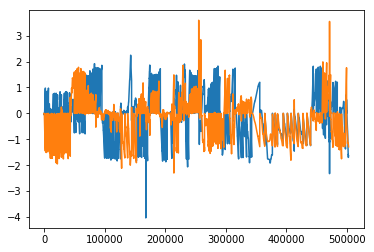

In [134]:
plt.plot(df6['x'][:])
plt.plot(df6['y'][:])
# plt.xlim([8700,11200])

(array([6.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 8.00000e+00,
        3.00000e+00, 5.02556e+05, 1.30000e+01, 7.00000e+00, 3.00000e+00]),
 array([-2159.99673581, -1836.23971434, -1512.48269286, -1188.72567139,
         -864.96864991,  -541.21162844,  -217.45460697,   106.30241451,
          430.05943598,   753.81645746,  1077.57347893]),
 <a list of 10 Patch objects>)

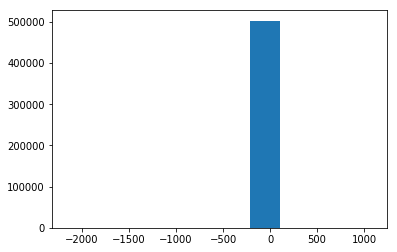

In [135]:
tt  = df6['t']
plt.hist(np.diff(tt))

In [136]:
xx = df6['x']
yy = df6['y']
distxxyy = np.sqrt(np.diff(xx)**2+np.diff(yy)**2)
speed = distxxyy/np.diff(tt)

/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


(array([165806.,  68287.,  54327.,  63956.,  60859.,  48604.,  35061.,
         23213.,  11467.,   5184.]),
 array([0.        , 0.02428692, 0.04857384, 0.07286077, 0.09714769,
        0.12143461, 0.14572153, 0.17000845, 0.19429538, 0.2185823 ,
        0.24286922]),
 <a list of 10 Patch objects>)

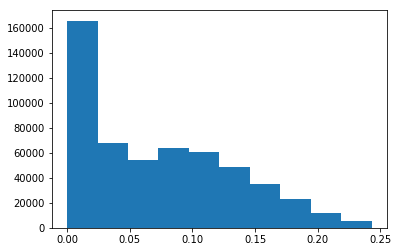

In [85]:
dt = 1/100.0
threshold = np.quantile(distxxyy,0.99)
plt.hist(distxxyy[distxxyy<threshold]/dt)

In [86]:
np.quantile(distxxyy,[0.95,0.99,1])

array([1.87749777e-03, 2.42869656e-03, 4.21449817e+00])

In [87]:
np.quantile(np.diff(tt),[0.95,0.99,1])

array([4.74081000e-02, 5.54991865e-02, 1.07757348e+03])

/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

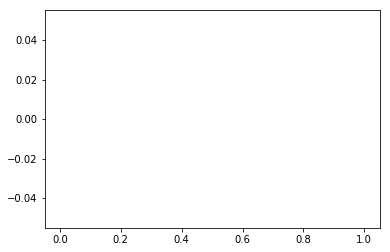

In [88]:
threshold = np.quantile(speed,0.99)
plt.hist(speed[speed<threshold])